In [1]:
pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.1-py3-none-any.whl size=146923 sha256=f8faa8217939bdf1f70fb57c20a378af82c784778b85d0a19350489ecfa3b177
  Stored in directory: /root/.cache/pip/wheels/75/bc/fd/739778254a2881ef96b139d0aaf60c6d4f9130bb1459b48f10
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=a72b01b8673c9e3ea721a57bf772d344da1ba73b52cd5d3114d63d217484c56d
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


In [2]:
import openml
import pandas as pd
from openml.datasets import edit_dataset, fork_dataset, get_dataset

In [3]:
datalist = openml.datasets.list_datasets(output_format="dataframe")
datalist = datalist[["did", "name", "NumberOfInstances", "NumberOfFeatures", "NumberOfClasses"]]

print(f"First 10 of {len(datalist)} datasets...")
datalist.head(n=10)

First 10 of 5402 datasets...


,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
2,2,anneal,898.0,39.0,5.0
3,3,kr-vs-kp,3196.0,37.0,2.0
4,4,labor,57.0,17.0,2.0
5,5,arrhythmia,452.0,280.0,13.0
6,6,letter,20000.0,17.0,26.0
7,7,audiology,226.0,70.0,24.0
8,8,liver-disorders,345.0,6.0,0.0
9,9,autos,205.0,26.0,6.0
10,10,lymph,148.0,19.0,4.0
11,11,balance-scale,625.0,5.0,3.0


In [4]:
# Select based on specific dataset ID.
dataset = openml.datasets.get_dataset(1067)

# Print a summary
print(
    f"This is dataset '{dataset.name}', the target feature is "
    f"'{dataset.default_target_attribute}'"
)
print(f"URL: {dataset.url}")
print(dataset.description[:500])

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


This is dataset 'kc1', the target feature is 'defects'
URL: https://api.openml.org/data/v1/download/53950/kc1.arff
**Author**: Mike Chapman, NASA  
**Source**: [tera-PROMISE](http://openscience.us/repo/defect/mccabehalsted/kc1.html) - 2004  
**Please cite**: Sayyad Shirabad, J. and Menzies, T.J. (2005) The PROMISE Repository of Software Engineering Databases. School of Information Technology and Engineering, University of Ottawa, Canada.  
  
**KC1 Software defect prediction**  
One of the NASA Metrics Data Program defect data sets. Data from software for storage management for receiving and processing groun


In [5]:
nasa, *_ = dataset.get_data()

In [6]:
X, y, categorical_indicator, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute
)
print(X.head())
print(X.info())

    loc  v(g)  ev(g)  iv(g)      n       v     l      d      i         e  ...  \
0   1.1   1.4    1.4    1.4    1.3    1.30  1.30   1.30   1.30      1.30  ...   
1   1.0   1.0    1.0    1.0    1.0    1.00  1.00   1.00   1.00      1.00  ...   
2  83.0  11.0    1.0   11.0  171.0  927.89  0.04  23.04  40.27  21378.61  ...   
3  46.0   8.0    6.0    8.0  141.0  769.78  0.07  14.86  51.81  11436.73  ...   
4  25.0   3.0    1.0    3.0   58.0  254.75  0.11   9.35  27.25   2381.95  ...   

         t  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0     1.30     2.0          2        2                  2      1.2        1.2   
1     1.00     1.0          1        1                  1      1.0        1.0   
2  1187.70    65.0         10        6                  0     18.0       25.0   
3   635.37    37.0          2        5                  0     16.0       28.0   
4   132.33    21.0          0        2                  0     11.0       10.0   

   total_Op  total_Opnd  b

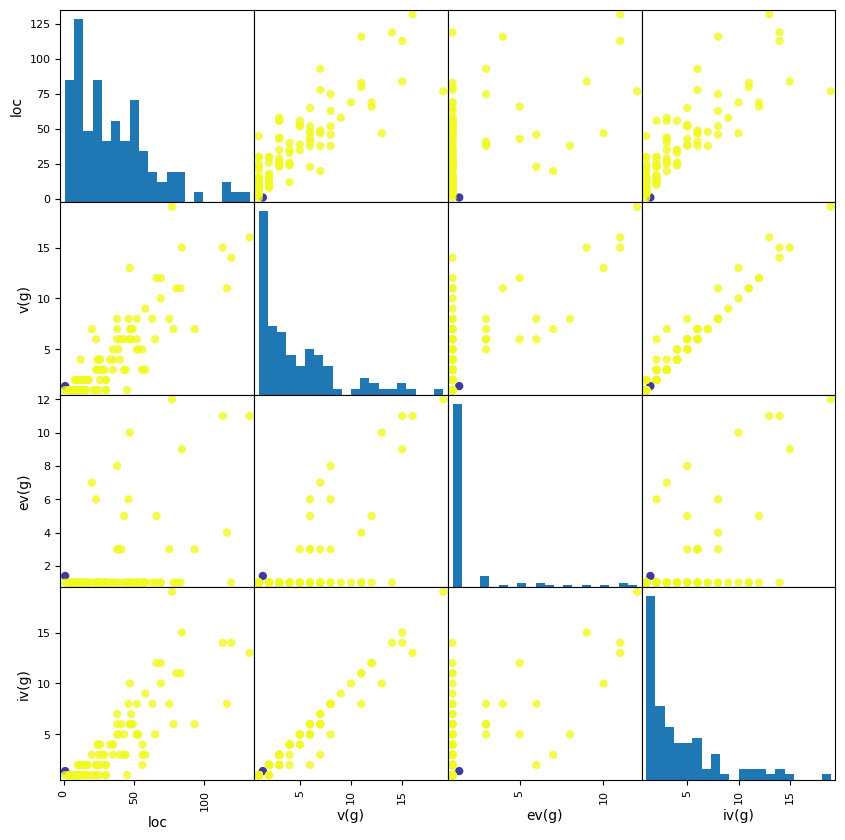

In [7]:
nasas = nasa.sample(n=1000)
_ = pd.plotting.scatter_matrix(
    X.iloc[:100, :4],
    c=y[:100],
    figsize=(10, 10),
    marker="o",
    hist_kwds={"bins": 20},
    alpha=0.8,
    cmap="plasma",
)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


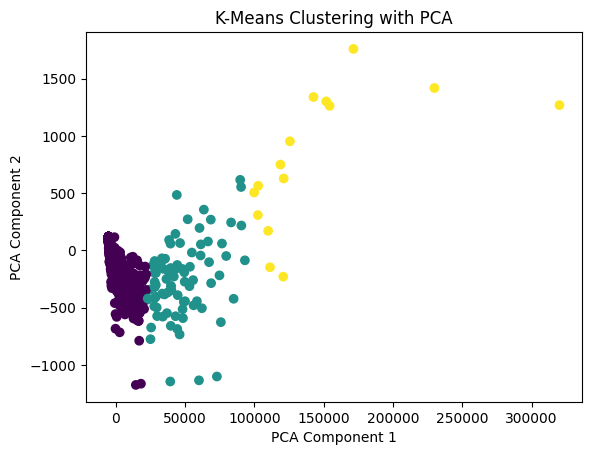

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Feature Extraction using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_pca)

# Visualizing the Clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()


In [14]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Extract loadings
loadings = pca.components_.T

# Create a DataFrame for better readability
feature_names = attribute_names
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=feature_names)

print(loading_matrix)


                        PC1       PC2
loc                0.001398 -0.075713
v(g)               0.000192 -0.006372
ev(g)              0.000093 -0.002056
iv(g)              0.000156 -0.006560
n                  0.004345 -0.181399
v                  0.027621 -0.964799
l                 -0.000005  0.000645
d                  0.000351 -0.015576
i                  0.000729 -0.078779
e                  0.998063  0.028093
b                  0.000009 -0.000320
t                  0.055448  0.001565
lOCode             0.001154 -0.061412
lOComment          0.000078 -0.005966
lOBlank            0.000152 -0.007444
locCodeAndComment  0.000015 -0.000189
uniq_Op            0.000207 -0.015461
uniq_Opnd          0.000538 -0.038061
total_Op           0.002677 -0.113471
total_Opnd         0.001668 -0.067925
branchCount        0.000386 -0.012529


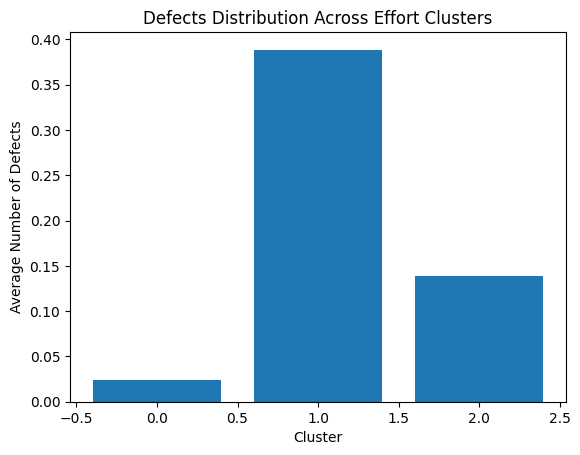

In [22]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Column 'e' is 'effort'
X_effort = X[['e']]

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
effort_clusters = gmm.fit_predict(X_effort)

X['effort_cluster'] = effort_clusters

# Incorporating the target variable 'y' into the DataFrame
X['defects'] = y

# Analyzing defects distribution across clusters
defects_distribution = X.groupby('effort_cluster')['defects'].mean()

# Visualizing the results
plt.bar(defects_distribution.index, defects_distribution.values)
plt.xlabel('Cluster')
plt.ylabel('Average Number of Defects')
plt.title('Defects Distribution Across Effort Clusters')
plt.show()


In [23]:
import numpy as np

# BIC for model selection
n_components_range = range(1, 10)
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

# Select the number of components with the lowest BIC score
best_n_components = n_components_range[np.argmin(bic_scores)]
print("Best number of components by BIC:", best_n_components)
print("BIC scores for each model:", bic_scores)


Best number of components by BIC: 4
BIC scores for each model: [168715.1357067294, 105483.04227032348, 104775.68053510402, 103792.73385323351, 104789.64028613259, 107050.56116564955, 107345.50470459717, 109917.94819405483, 109085.42044768235]


In [24]:
import numpy as np

# fitted Gaussian Mixture Model
probabilities = gmm.predict_proba(X)
# Threshold for outliers is set to 5th percentile
threshold = np.percentile(probabilities.max(axis=1), 5)
outliers = X[probabilities.max(axis=1) < threshold]
print(outliers)


       loc  v(g)  ev(g)  iv(g)      n       v     l      d      i         e  \
5     43.0   3.0    1.0    3.0  115.0  569.73  0.09  11.27  50.53   6423.73   
6     48.0   6.0    1.0    6.0  149.0  751.61  0.06  15.43  48.72  11596.34   
8     47.0   6.0    1.0    6.0  149.0  745.00  0.06  16.20  45.99  12069.00   
21    35.0   3.0    1.0    3.0  108.0  529.94  0.08  13.00  40.76   6889.27   
28    44.0   3.0    1.0    3.0  127.0  603.87  0.06  16.00  37.74   9661.93   
...    ...   ...    ...    ...    ...     ...   ...    ...    ...       ...   
1878  49.0   4.0    1.0    4.0  109.0  559.09  0.09  11.74  47.63   6563.25   
1883  43.0   4.0    1.0    4.0  105.0  525.00  0.08  12.90  40.70   6772.50   
1917  54.0   5.0    1.0    5.0  118.0  614.72  0.09  11.52  53.36   7081.52   
1987  26.0   3.0    1.0    3.0   88.0  423.05  0.06  17.50  24.17   7403.33   
2019  52.0   6.0    5.0    5.0  139.0  729.46  0.06  15.65  46.60  11417.66   

      ...  lOComment  lOBlank  locCodeAndComment  u

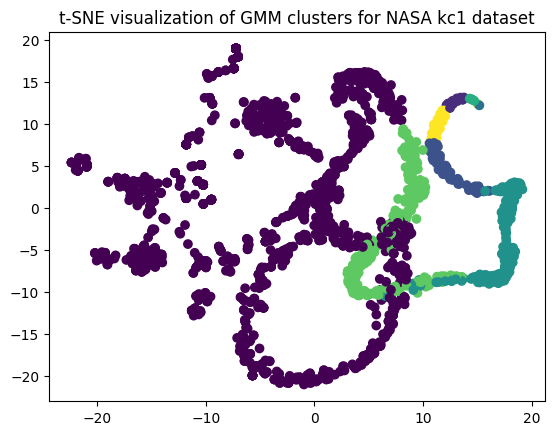

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

clusters = gmm.predict(X)
X_embedded = TSNE(n_components=3).fit_transform(X)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=clusters, cmap='viridis')
plt.title('t-SNE visualization of GMM clusters for NASA kc1 dataset')
plt.show()


In [27]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# GMM clustering
gmm_clusters = gmm.predict(X_scaled)

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_clusters = hierarchical.fit_predict(X_scaled)

# Ensemble clustering results
ensemble_clusters = np.column_stack((gmm_clusters, hierarchical_clusters))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


In [28]:
from sklearn.utils import resample

bootstrap_samples = 100  # Number of bootstrap samples
cluster_labels = []

for i in range(bootstrap_samples):
    # Creating a bootstrap sample
    X_sample = resample(X_scaled)
    # Fitting GMM to the bootstrap sample
    gmm_sample = GaussianMixture(n_components=4, random_state=i)
    gmm_sample.fit(X_sample)
    # Storing the cluster labels for the sample
    sample_labels = gmm_sample.predict(X_sample)
    cluster_labels.append(sample_labels)

# Convert the list of arrays into a 2D array for analysis
cluster_labels = np.array(cluster_labels)


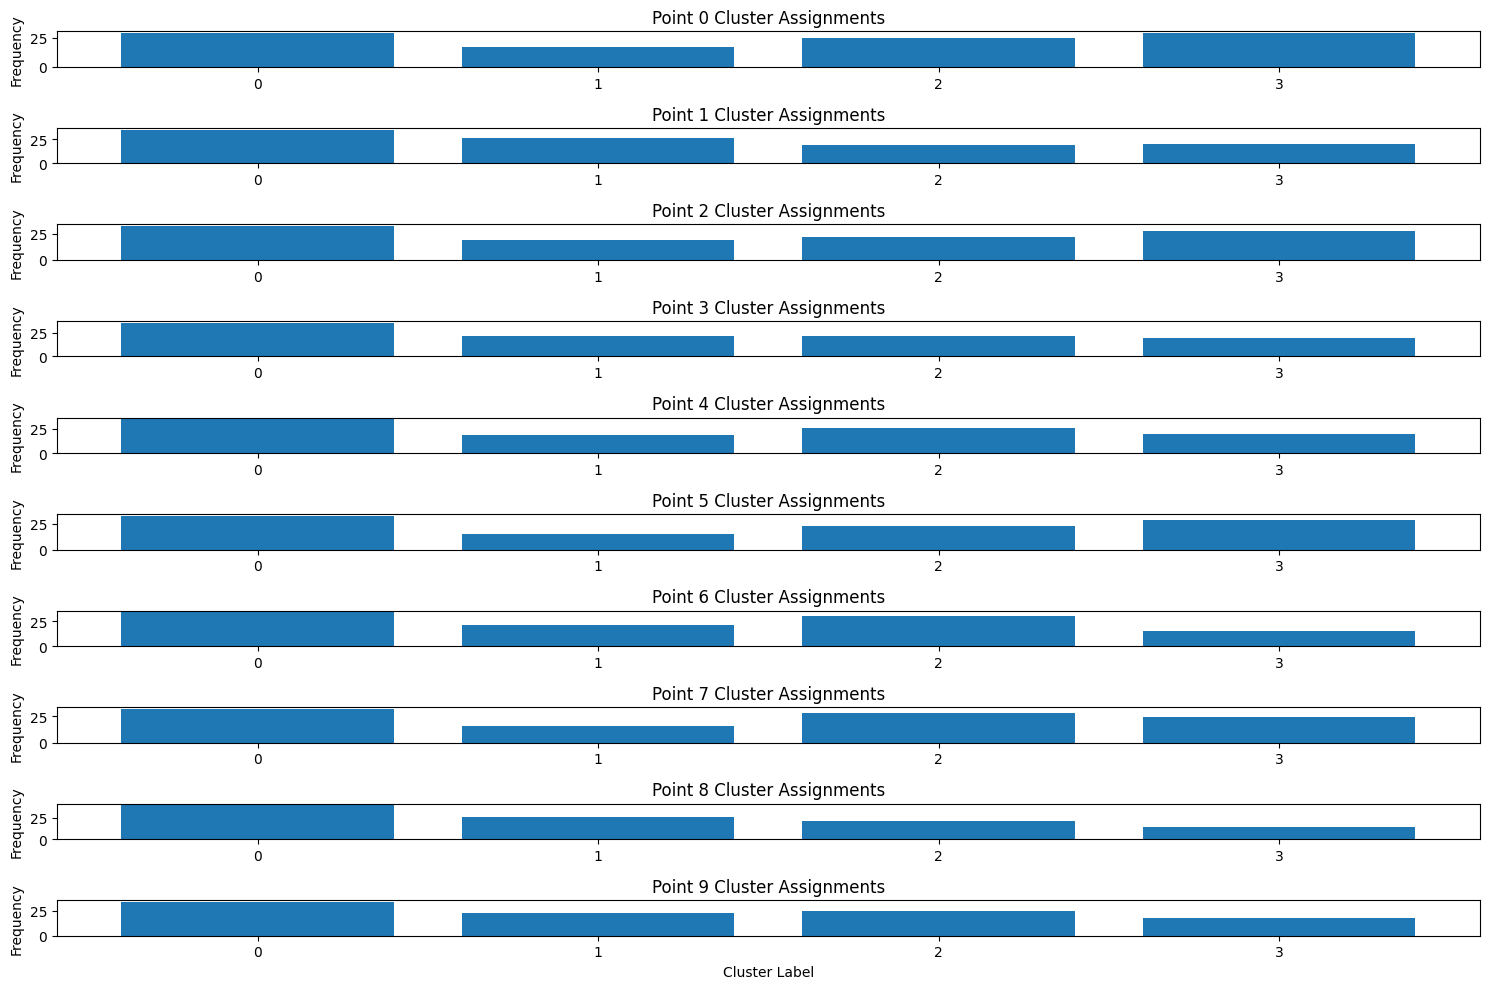

In [29]:
import matplotlib.pyplot as plt

# Select a few data points to visualize
selected_points = range(10)

# Plotting
plt.figure(figsize=(15, 10))
for idx, point in enumerate(selected_points):
    plt.subplot(len(selected_points), 1, idx+1)
    plt.hist(cluster_labels[:, point], bins=np.arange(5)-0.5, rwidth=0.8)
    plt.title(f'Point {point} Cluster Assignments')
    plt.xticks(range(4))
    plt.ylabel('Frequency')
plt.xlabel('Cluster Label')
plt.tight_layout()
plt.show()


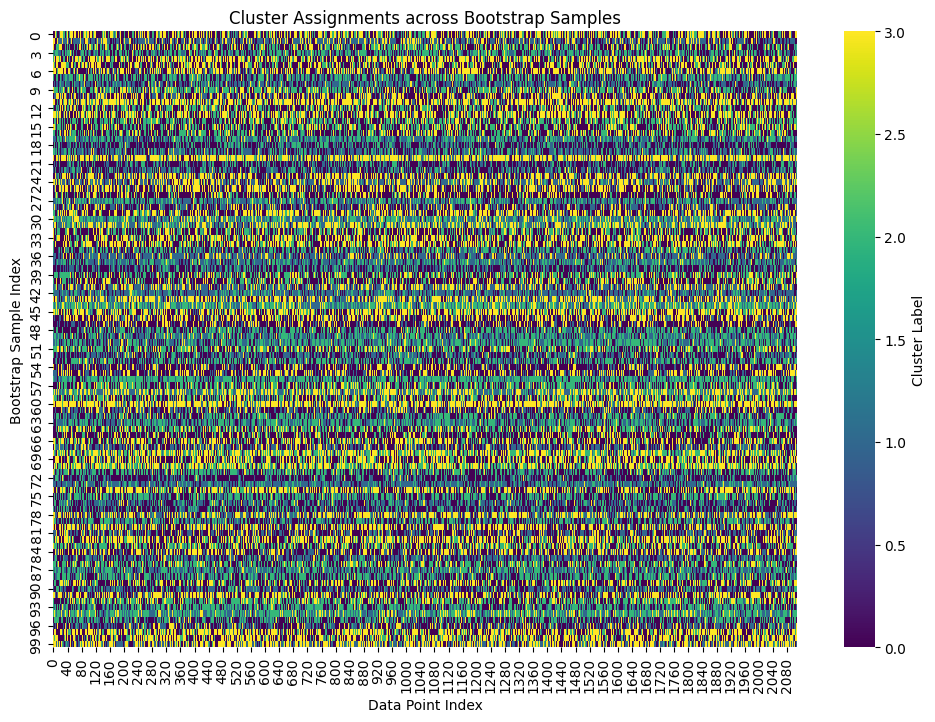

In [30]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_labels, cmap='viridis', cbar_kws={'label': 'Cluster Label'})
plt.title('Cluster Assignments across Bootstrap Samples')
plt.xlabel('Data Point Index')
plt.ylabel('Bootstrap Sample Index')
plt.show()


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X[['e']], y, test_size=0.3, random_state=42)

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.86      0.98      0.91       533
        True       0.50      0.13      0.21       100

    accuracy                           0.84       633
   macro avg       0.68      0.55      0.56       633
weighted avg       0.80      0.84      0.80       633

[[520  13]
 [ 87  13]]


Precision (False): Of all the instances where the model predicted 'False' (no defect), 86% were actually 'False'. This is the model's accuracy in predicting non-defective modules.

Precision (True): Of all the instances where the model predicted 'True' (defect), 50% were actually 'True'. This indicates the model's accuracy in predicting defective modules is quite low.

Recall (False): Of all the actual 'False' instances, the model correctly identified 98% of them. This shows that the model is very good at identifying non-defective modules.

Recall (True): Of all the actual 'True' instances, the model correctly identified only 13% of them. This means that the model missed a lot of defective modules, only detecting a small fraction.

F1-Score (False): The F1-score for 'False' is 0.91, which is a balance between precision and recall, indicating good model performance for non-defective modules.

F1-Score (True): The F1-score for 'True' is 0.21, which is quite low, indicating that the balance between precision and recall is poor for the defective modules.

Support: The support is the number of actual occurrences for each class in the dataset. There are 533 non-defective modules and 100 defective modules in the test set.

Accuracy: Overall, the model correctly predicted 84% of the total cases. However, this number is more reflective of the 'False' class due to class imbalance.

Macro Avg: The macro average for precision, recall, and F1-score gives equal weight to both classes. The average is not weighted by the class imbalance, hence it's lower than the weighted average.

Weighted Avg: This average takes into account the imbalance by weighting the metrics according to the number of instances in each class.
***

**Confusion Matrix:**
Top-Left (True Negatives): 520 instances were correctly predicted as non-defective.
Top-Right (False Positives): 13 instances were incorrectly predicted as defective when they were not.
Bottom-Left (False Negatives): 87 instances were incorrectly predicted as non-defective when they were actually defective.
Bottom-Right (True Positives): 13 instances were correctly predicted as defective.
Interpretation:

The model is biased towards predicting 'False', which may be due to class imbalance (more 'False' instances than 'True').
While the model is good at identifying non-defective modules, it performs poorly in identifying the actual defective modules.
The low recall for the 'True' class indicates that the model is not capturing the majority of defective cases, which is critical for a defect prediction model.
Efforts to improve the model should focus on increasing the true positive rate (recall for the 'True' class) without sacrificing the precision too much. This could include resampling techniques, threshold adjustment, or using different algorithms.

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.mixture import GaussianMixture

# Cross-validation to assess cluster stability
gmm = GaussianMixture(n_components=3, random_state=42)
scores = cross_val_score(gmm, X, cv=5)  # 5-fold cross-validation
print("Cross-validated scores:", scores)


Cross-validated scores: [-3.88327243e+05 -2.04632352e+01 -3.54939574e+01 -2.11962329e+01
 -2.27732261e+01]


In [34]:
from sklearn.utils import resample

# Bootstrapping
bootstrap_samples = 100  # Number of bootstrap samples
cluster_consistency = []

for i in range(bootstrap_samples):
    # Creating a bootstrap sample
    X_sample = resample(X)
    # Fitting GMM to the bootstrap sample
    gmm = GaussianMixture(n_components=3, random_state=i)
    gmm.fit(X_sample)
    labels = gmm.predict(X_sample)
    cluster_consistency.append(labels)



In [35]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
anomalies = iso_forest.fit_predict(X)

# Identify data points classified as anomalies (where the prediction is -1)
anomaly_indices = np.where(anomalies == -1)
anomalous_data = X.iloc[anomaly_indices]


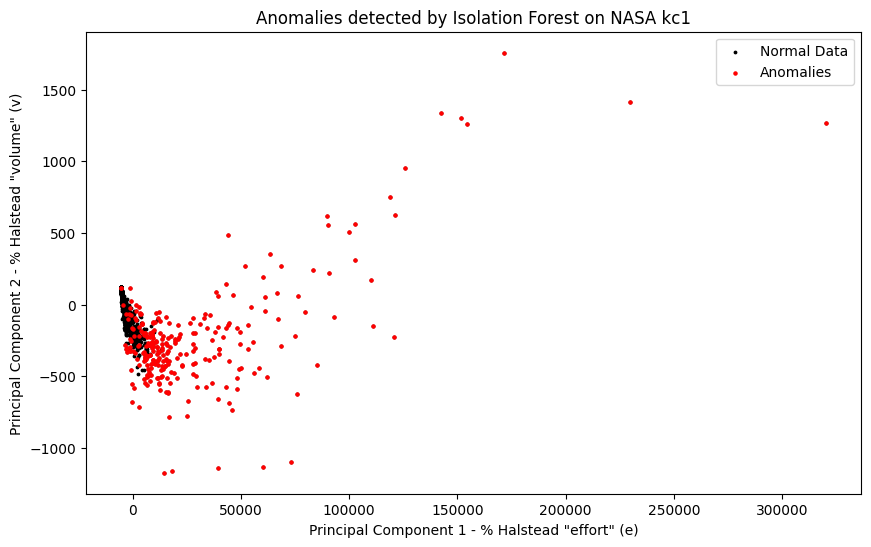

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA on the data for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='k', s=3, label='Normal Data')

# Plot the anomalies
plt.scatter(X_pca[anomaly_indices, 0], X_pca[anomaly_indices, 1], color='r', s=5, label='Anomalies')

plt.title('Anomalies detected by Isolation Forest on NASA kc1')
plt.xlabel('Principal Component 1 - % Halstead "effort" (e)')
plt.ylabel('Principal Component 2 - % Halstead "volume" (v)')
plt.legend()
plt.show()


In [37]:
# Fit PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Get the PCA components (loadings)
loadings = pca.components_

# Get the most important features for PC1 and PC2 by looking at the absolute values of the loadings
most_important_pc1 = np.argmax(np.abs(loadings[0]))
most_important_pc2 = np.argmax(np.abs(loadings[1]))

feature_names = list(X.columns)

# Print the most important features
print("Most important feature for PC1:", feature_names[most_important_pc1])
print("Most important feature for PC2:", feature_names[most_important_pc2])


Most important feature for PC1: e
Most important feature for PC2: v


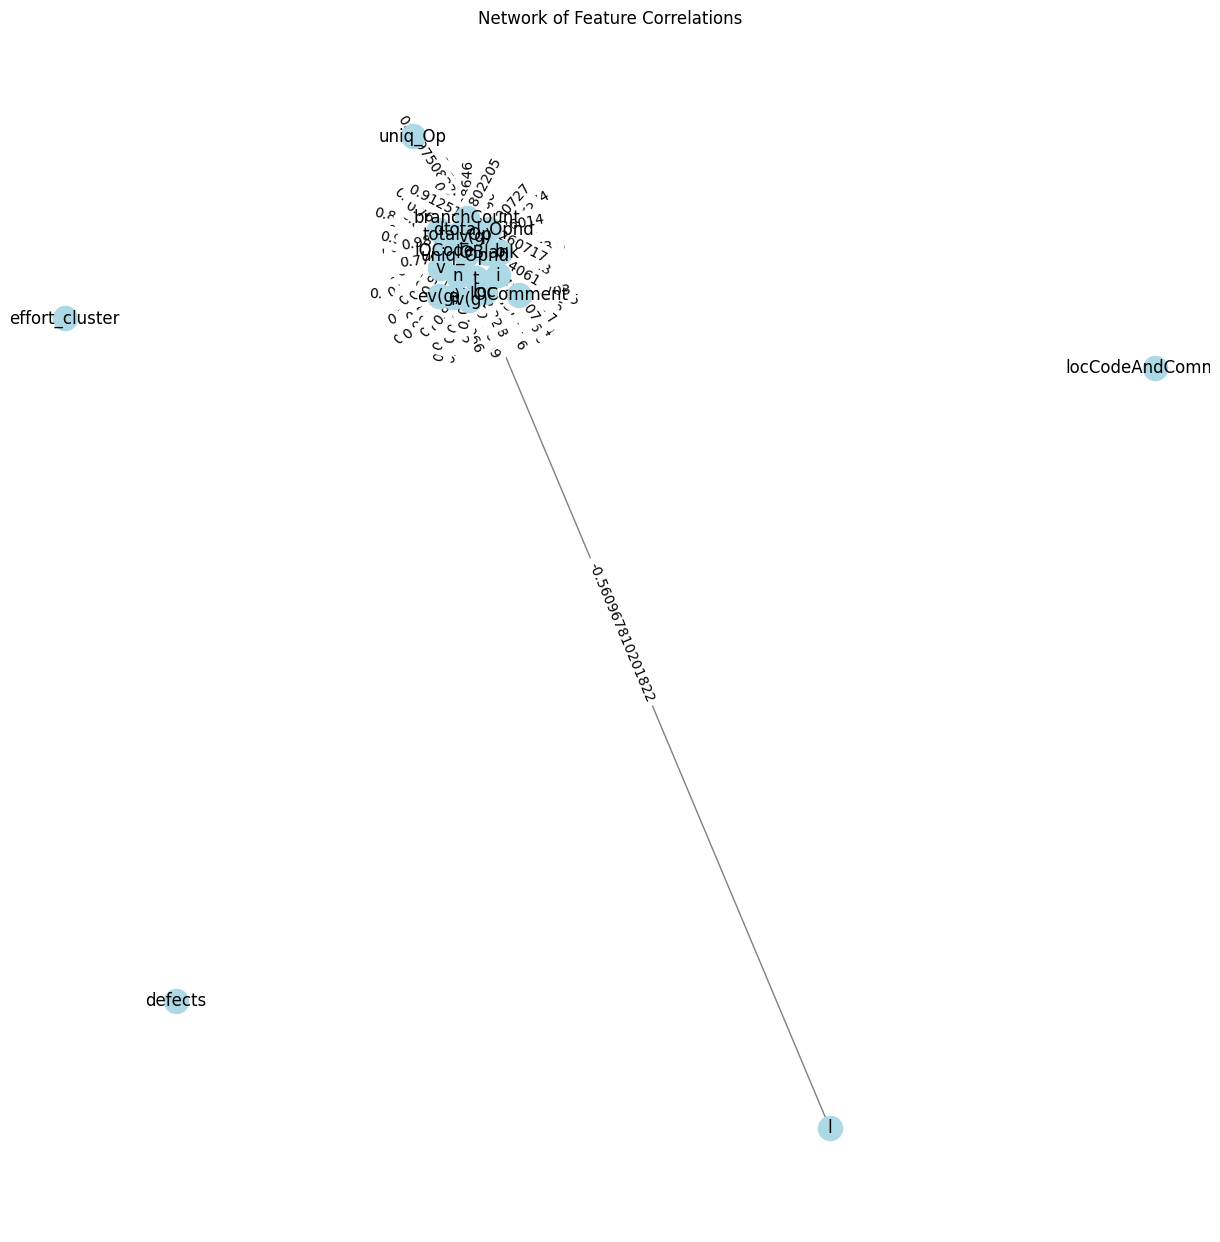

In [38]:
import networkx as nx
import seaborn as sns

# Calculate the correlation matrix
corr = X.corr()

# Initialize graph
G = nx.Graph()

# Add nodes
for feature in corr.columns:
    G.add_node(feature)

# Add edges with weights based on correlation
for i, feature_i in enumerate(corr.columns):
    for j, feature_j in enumerate(corr.columns):
        if i < j:  # Avoid self-loops and duplicate edges
            weight = corr.iloc[i, j]
            if abs(weight) > 0.5:  # Only consider strong correlations
                G.add_edge(feature_i, feature_j, weight=weight)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Network of Feature Correlations')
plt.show()


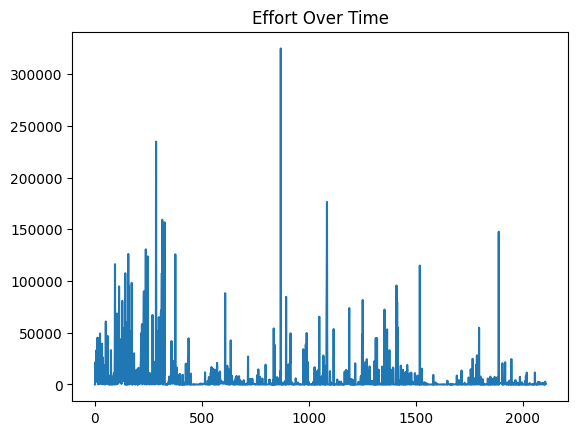

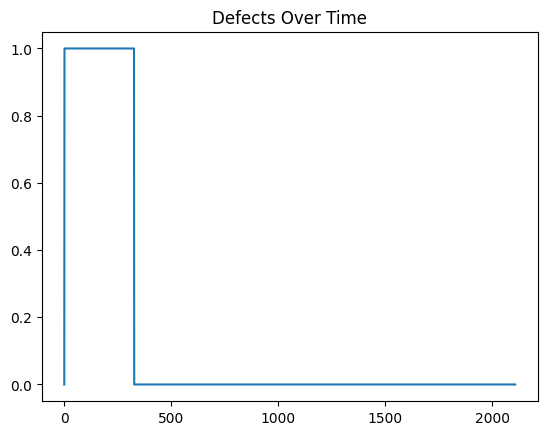

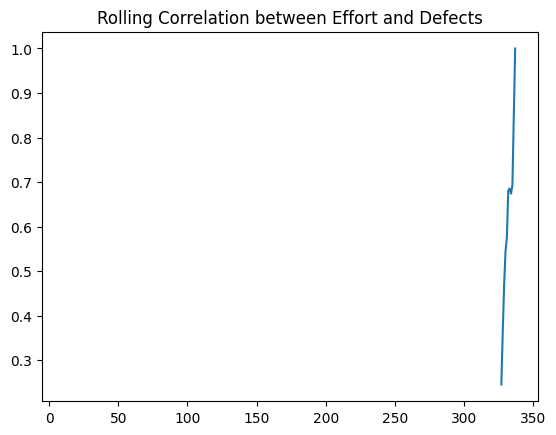

In [39]:
import matplotlib.pyplot as plt


# plot 'effort' and 'defects' over time
nasa['e'].plot(title='Effort Over Time')
plt.show()

#print(nasa['defects'].dtype)

nasa['defects_numeric'] = nasa['defects'].astype(int)

nasa['defects_numeric'].plot(title='Defects Over Time')
plt.show()

rolling_corr = nasa['e'].rolling(window=12).corr(nasa['defects_numeric'])
rolling_corr.plot(title='Rolling Correlation between Effort and Defects')
plt.show()


Epoch 1/100
27/27 [==============================] - 2s 22ms/step - loss: 1.1440 - val_loss: 0.4882
Epoch 2/100
27/27 [==============================] - 0s 14ms/step - loss: 0.8207 - val_loss: 0.3856
Epoch 3/100
27/27 [==============================] - 0s 14ms/step - loss: 0.7583 - val_loss: 0.3617
Epoch 4/100
27/27 [==============================] - 0s 12ms/step - loss: 0.7327 - val_loss: 0.3431
Epoch 5/100
27/27 [==============================] - 0s 14ms/step - loss: 0.7185 - val_loss: 0.3380
Epoch 6/100
27/27 [==============================] - 0s 15ms/step - loss: 0.7064 - val_loss: 0.3322
Epoch 7/100
27/27 [==============================] - 0s 15ms/step - loss: 0.6988 - val_loss: 0.3289
Epoch 8/100
27/27 [==============================] - 0s 12ms/step - loss: 0.6947 - val_loss: 0.3275
Epoch 9/100
27/27 [==============================] - 0s 11ms/step - loss: 0.6921 - val_loss: 0.3261
Epoch 10/100
27/27 [==============================] - 0s 10ms/step - loss: 0.6902 - val_loss: 0.3257

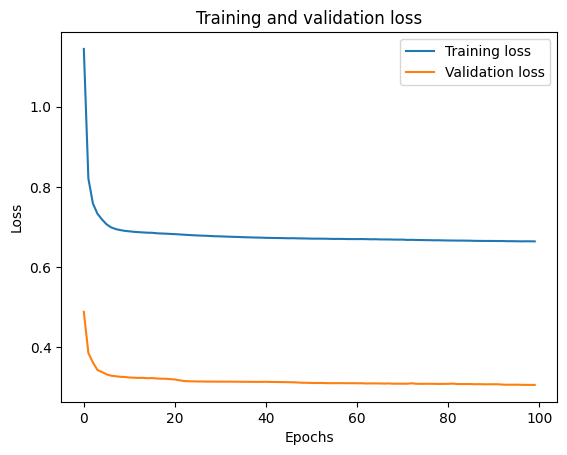

66/66 [==============================] - 0s 2ms/step


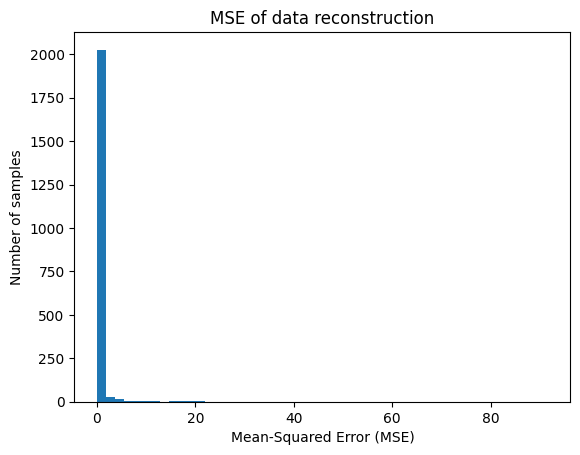

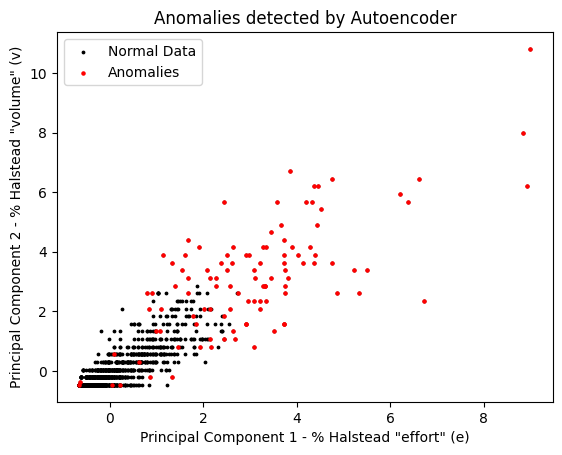

In [47]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the size of our encoding
encoding_dim = 5

# Define the input layer
input_data = Input(shape=(X_scaled.shape[1],))

# Define the encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_data)

# Define the decoding layer
decoded = Dense(X_scaled.shape[1], activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_data, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_scaled, X_scaled,
                          epochs=100,
                          batch_size=64,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1)

# Plot the training history
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.show()

# Use the autoencoder to reconstruct the data
X_pred = autoencoder.predict(X_scaled)

# Calculate the mean squared error of the reconstruction
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)

# Plot the MSE of the reconstruction
plt.hist(mse, bins=50)
plt.xlabel('Mean-Squared Error (MSE)')
plt.ylabel('Number of samples')
plt.title('MSE of data reconstruction')
plt.show()

# Define a threshold for which data points are considered anomalies
threshold = np.percentile(mse, 95)  # top 5% of highest MSE as anomalies

# Identify anomalies
anomalies = mse > threshold

# Plot anomalies
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='k', s=3, label='Normal Data')
plt.scatter(X_scaled[anomalies, 0], X_scaled[anomalies, 1], color='r', s=5, label='Anomalies')
plt.xlabel('Principal Component 1 - % Halstead "effort" (e)')
plt.ylabel('Principal Component 2 - % Halstead "volume" (v)')
plt.legend()
plt.title('Anomalies detected by Autoencoder')
plt.show()


In [41]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=a471e36f81a8c87a75e8d0c500425622db7262309a93ef45b36f72266cf51f4a
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


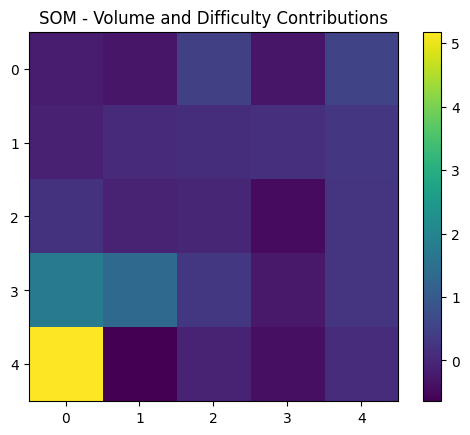

In [42]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the SOM; 5x5
som = MiniSom(5, 5, X_scaled.shape[1], sigma=0.5, learning_rate=0.5)
som.train_random(X_scaled, 100)  # Train with 100 iterations

# Create an empty map with the same dimensions as the SOM
weights_map = np.zeros((5, 5))

# Fill the map with the sum of the 'volume' and 'difficulty' weights for each neuron
for i in range(5):
    for j in range(5):
        neuron_weights = som.get_weights()[i, j]
        volume_index = list(X.columns).index('v')
        difficulty_index = list(X.columns).index('d')
        weights_map[i, j] = neuron_weights[volume_index] + neuron_weights[difficulty_index]

plt.imshow(weights_map, cmap='viridis')
plt.colorbar()
plt.title('SOM - Volume and Difficulty Contributions')
plt.show()


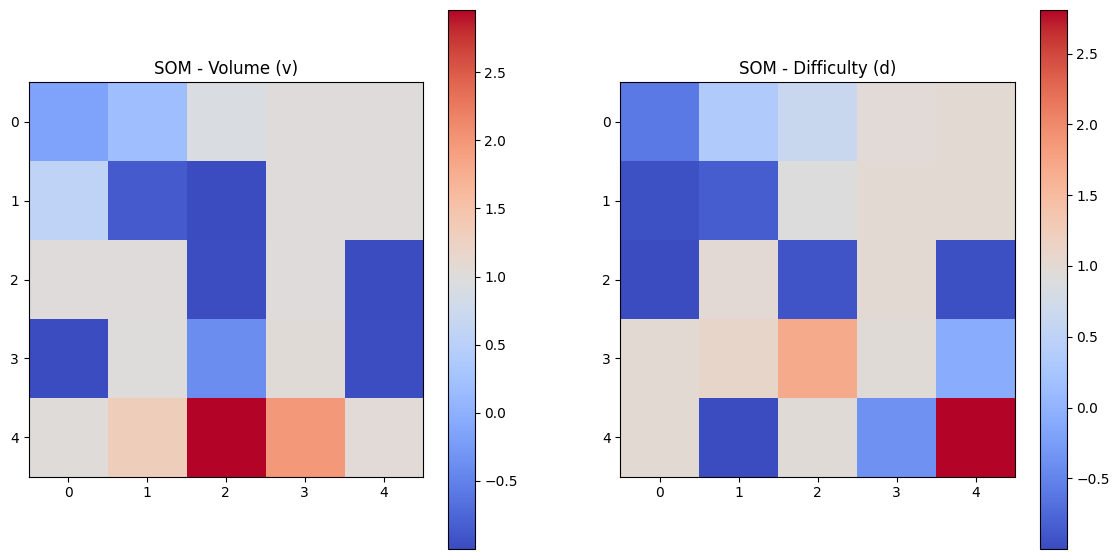

In [43]:
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np


# Initialize and train SOM for 'volume'
som_volume = MiniSom(5, 5, 1, sigma=0.5, learning_rate=0.5)
som_volume.train_random(X_scaled[:, X.columns.get_loc('v')].reshape(-1, 1), 100)

# Initialize and train SOM for 'difficulty'
som_difficulty = MiniSom(5, 5, 1, sigma=0.5, learning_rate=0.5)
som_difficulty.train_random(X_scaled[:, X.columns.get_loc('d')].reshape(-1, 1), 100)

# Prepare the plots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plotting the response for each neuron for 'volume'
weights_volume = som_volume.get_weights().reshape(5, 5)
axs[0].imshow(weights_volume, cmap='coolwarm', interpolation='none')
axs[0].set_title('SOM - Volume (v)')
plt.colorbar(axs[0].imshow(weights_volume, cmap='coolwarm', interpolation='none'), ax=axs[0])

# Plotting the response for each neuron for 'difficulty'
weights_difficulty = som_difficulty.get_weights().reshape(5, 5)
axs[1].imshow(weights_difficulty, cmap='coolwarm', interpolation='none')
axs[1].set_title('SOM - Difficulty (d)')
plt.colorbar(axs[1].imshow(weights_difficulty, cmap='coolwarm', interpolation='none'), ax=axs[1])

# Show the plots
plt.show()


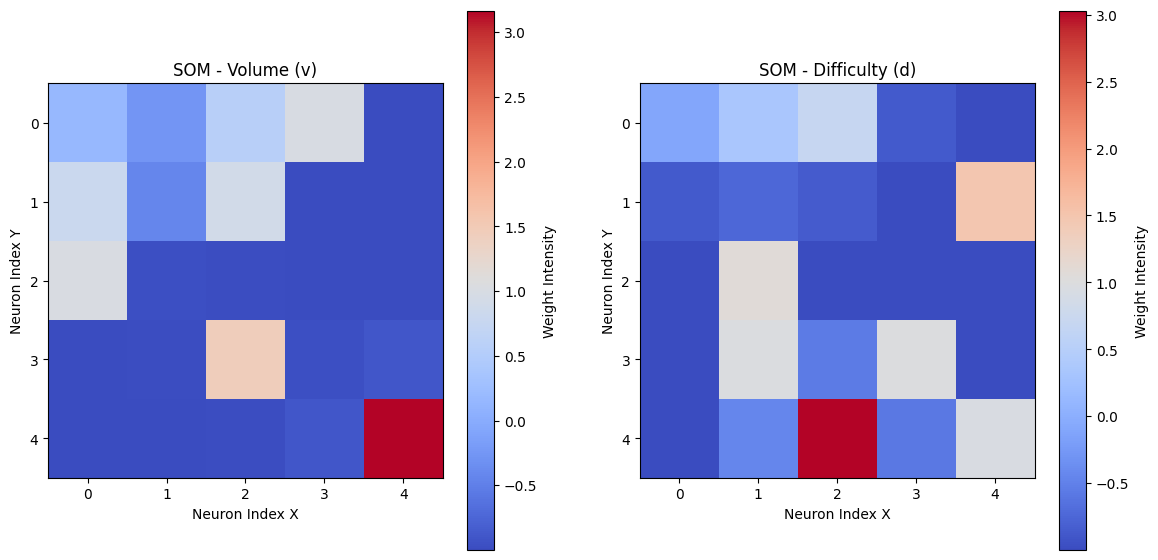

In [44]:
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np


# Initialize and train SOM for 'volume'
som_volume = MiniSom(5, 5, 1, sigma=0.5, learning_rate=0.5)
som_volume.train_random(X_scaled[:, X.columns.get_loc('v')].reshape(-1, 1), 100)

# Initialize and train SOM for 'difficulty'
som_difficulty = MiniSom(5, 5, 1, sigma=0.5, learning_rate=0.5)
som_difficulty.train_random(X_scaled[:, X.columns.get_loc('d')].reshape(-1, 1), 100)

# Prepare the plots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plotting the response for each neuron for 'volume'
weights_volume = som_volume.get_weights().reshape(5, 5)
volume_plot = axs[0].imshow(weights_volume, cmap='coolwarm', interpolation='none')
axs[0].set_title('SOM - Volume (v)')
axs[0].set_xlabel('Neuron Index X')
axs[0].set_ylabel('Neuron Index Y')
fig.colorbar(volume_plot, ax=axs[0], orientation='vertical', label='Weight Intensity')

# Plotting the response for each neuron for 'difficulty'
weights_difficulty = som_difficulty.get_weights().reshape(5, 5)
difficulty_plot = axs[1].imshow(weights_difficulty, cmap='coolwarm', interpolation='none')
axs[1].set_title('SOM - Difficulty (d)')
axs[1].set_xlabel('Neuron Index X')
axs[1].set_ylabel('Neuron Index Y')
fig.colorbar(difficulty_plot, ax=axs[1], orientation='vertical', label='Weight Intensity')

# Show the plots
plt.show()


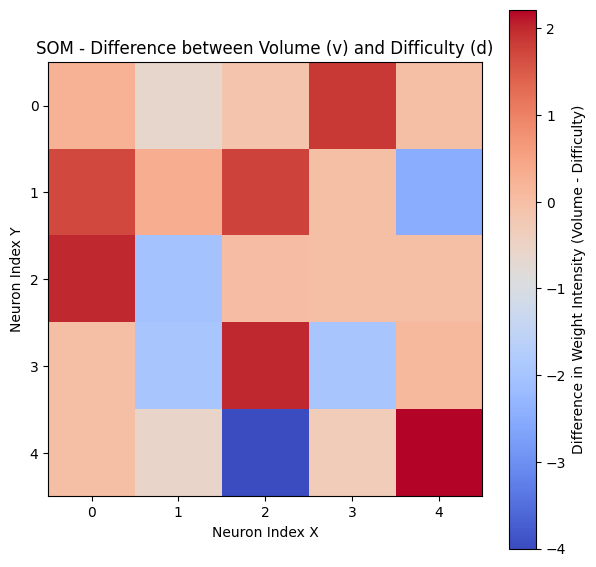

In [45]:
# Calculate the difference between the 'volume' and 'difficulty' weights
weights_difference = weights_volume - weights_difficulty

# Plot the difference
plt.figure(figsize=(7, 7))
plt.imshow(weights_difference, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Difference in Weight Intensity (Volume - Difficulty)')
plt.title('SOM - Difference between Volume (v) and Difficulty (d)')
plt.xlabel('Neuron Index X')
plt.ylabel('Neuron Index Y')
plt.show()

In [46]:
# Define new thresholds for positive and negative cells since the neutral range is too tight
positive_threshold = 0.25  # Cells with values greater are considered positive
negative_threshold = -0.25  # Cells with values less are considered negative

# Identify positive, negative, and neutral cells based on the new thresholds
positive_cells = np.sum(weights_difference > positive_threshold)
negative_cells = np.sum(weights_difference < negative_threshold)
neutral_cells = np.sum((weights_difference <= positive_threshold) & (weights_difference >= negative_threshold))

# The metrics are calculated as before
metric_positive = positive_cells * np.mean(weights_difference[weights_difference > positive_threshold])
metric_negative = negative_cells * np.mean(weights_difference[weights_difference < negative_threshold])

# Create a combined metric that compares the importance
combined_metric = metric_positive + metric_negative  # Note: metric_negative is already negative

combined_metric, metric_positive, metric_negative, positive_cells, negative_cells, neutral_cells

(-1.782465475842292, 12.114796341389177, -13.897261817231469, 8, 8, 9)